En este caso se han realizado las siguientes modificaciones:
1. Arquitectura: En este caso se ha usado una squeezenet1_0 que deriva de Alexnet y tiene 50x menos parametros
https://pytorch.org/hub/pytorch_vision_squeezenet/

2.No se ha modificado el tamaño de las imagenes, se usa la resolución por defecto.

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from fastai.vision.all import *
import torch
import skimage
from PIL import Image

In [18]:
path = Path('/home/yani/Pruebas TFG/DatasetConIncorrectas/Tipo2Oversampling/Completo')
dls = ImageDataLoaders.from_folder(path, train='train', valid='valid', bs=9, seed=43)

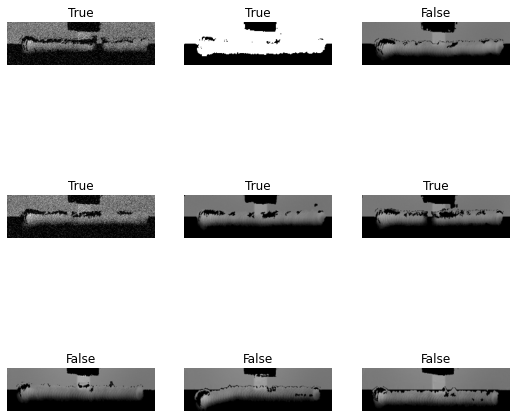

In [19]:
dls.show_batch()

In [20]:
precision = Precision()
f1 = F1Score()

In [22]:
learn = Learner(dls, squeezenet1_0(pretrained = True), opt_func = SGD,
              metrics=[accuracy,precision,f1])

SuggestedLRs(lr_min=0.0005248074419796466, lr_steep=0.0004786300996784121)

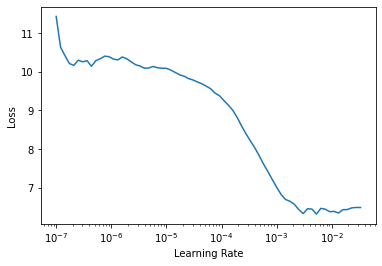

In [23]:
learn.lr_find()

In [24]:
learn.fit(5,lr=5e-4)

epoch,train_loss,valid_loss,accuracy,precision_score,f1_score,time
0,0.292407,0.256671,0.874101,0.978261,0.339623,00:10
1,0.155679,0.157326,0.943885,0.768061,0.838174,00:10
2,0.099644,0.157917,0.943885,0.747368,0.845238,00:10
3,0.062119,0.058490,0.982734,0.957746,0.944444,00:10
4,0.049992,0.038943,0.990647,0.963964,0.970522,00:10


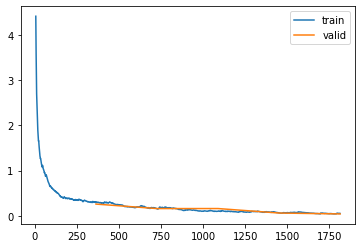

In [25]:
learn.recorder.plot_loss()

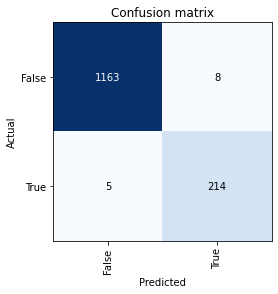

In [26]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

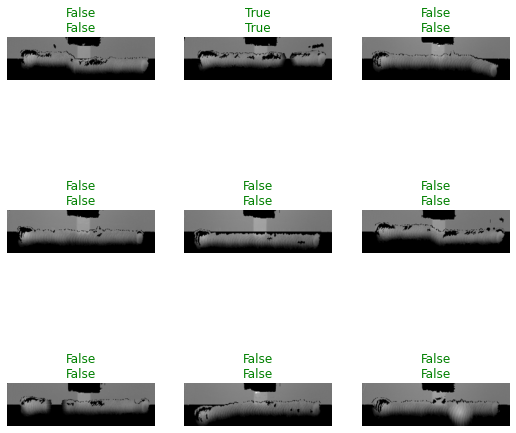

In [27]:
learn.show_results()

In [19]:
learn.summary()

SqueezeNet (Input shape: 9)
Layer (type)         Output Shape         Param #    Trainable 
                     9 x 96 x 32 x 117   
Conv2d                                    14208      True      
ReLU                                                           
MaxPool2d                                                      
____________________________________________________________________________
                     9 x 16 x 16 x 58    
Conv2d                                    1552       True      
ReLU                                                           
____________________________________________________________________________
                     9 x 64 x 16 x 58    
Conv2d                                    1088       True      
ReLU                                                           
____________________________________________________________________________
                     9 x 64 x 16 x 58    
Conv2d                                    9280       True    